> This is one of the 100 recipes of the [IPython Cookbook](http://ipython-books.github.io/), the definitive guide to high-performance scientific computing and data science in Python.


# 4.2. Profiling your code easily with cProfile and IPython

Standard imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

This function generates an array with random, uniformly distributed +1 and -1.

In [4]:
def step(*shape):
    # Create a random n-vector with +1 or -1 values.
    return 2 * (np.random.random_sample(shape) < .5) - 1

We simulate $n$ random walks, and look at the histogram of the walks over time.

In [14]:
%%prun -s cumulative -q -l 10 -T prun0
# We profile the cell, sort the report by "cumulative time",
# limit it to 10 lines, and save it to a file "prun0".
n = 10000
iterations = 50
z=step(iterations, n)
x = np.cumsum(step(iterations, n), axis=0)
bins = np.arange(-30, 30, 1)
y = np.vstack([np.histogram(x[i,:], bins)[0] for i in range(iterations)])

 
*** Profile printout saved to text file 'prun0'. 


(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 2469,    0, 5037,    0, 2494,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0], dtype=int64), array([-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18,
       -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
        -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
         9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29]))


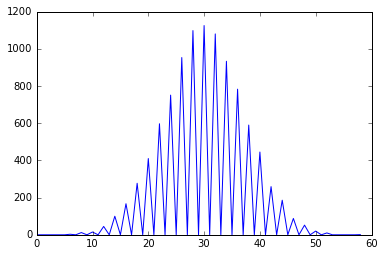

In [32]:
bins = np.arange(-30, 30, 1)
h  = [np.histogram(x[i,:], bins) for i in range(iterations)]
print(h[1])
plt.plot(h[49][0])


x.shape

In [ ]:
print(open('prun0', 'r').read())

The most expensive functions are respectively `histogram` (37 ms), `rand` (19 ms), and `cumsum` (5 ms).

We plot the array `y`, representing the distribution of the particles over time.

In [ ]:
plt.figure(figsize=(6,6));
plt.imshow(y, cmap='hot');

We now run the same code with 10 times more iterations.

In [ ]:
%%prun -s cumulative -q -l 10 -T prun1
n = 10000
iterations = 500
x = np.cumsum(step(iterations, n), axis=0)
bins = np.arange(-30, 30, 1)
y = np.vstack([np.histogram(x[i,:], bins)[0] for i in range(iterations)])

In [ ]:
print(open('prun1', 'r').read())

The most expensive functions are this time respectively `histogram` (566 ms), `cumsum` (388 ms) and `rand` (241 ms). `cumsum`'s execution time was negligible in the first case, whereas it is not in this case (due to the higher number of iterations).

> You'll find all the explanations, figures, references, and much more in the book (to be released later this summer).

> [IPython Cookbook](http://ipython-books.github.io/), by [Cyrille Rossant](http://cyrille.rossant.net), Packt Publishing, 2014 (500 pages).